# Sentiment Analysis: IMDB Movie Reviews

<img src='https://upload.wikimedia.org/wikipedia/commons/6/69/IMDB_Logo_2016.svg'>

## Loading Data

In [1]:
# You can get IMDB Dataset from here: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# extract downloaded files


In [0]:
# After extraction, folder aclImdb contains two folders as follows:
#  * train
#     * pos reviews
#     * neg reviews 
#  * test
#     * pos reviews
#     * neg reviews

# Let's, load movie reviews in pandas dataframe and add corresponding label.

In [1]:
pwd

'C:\\Users\\Master'

In [2]:
import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
      
  return data

In [3]:
import pandas as pd

df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb_v1/aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb_v1/aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb_v1/aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb_v1/aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (43501, 2)


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,I liked the film. Some of the action scenes we...,1
2,Somewhat funny and well-paced action thriller ...,1
3,Just two comments....SEVEN years apart? Hardly...,1
4,"Another Aussie masterpiece, this delves into t...",1


## EDA

In [4]:
# No null values in dataset.
df['review'].isnull().sum()

0

In [6]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

Total Number of positive reviews in data:  18501
Total Number of negative reviews in data:  25000


__Observation:__ Data contains equal amount of positive and negative reviews.

In [7]:
# sample positive movie review
df[df['label']==1].sample(n=1)['review'].iloc[0]

'LA ANTENA (Esteban Sapir - Argentina 2005).<br /><br />A completely unique take on silent cinema in this fairy-tale like story by Esteban Sapir, beautifully shot in black-and-white and practically without dialog, "La Antena" is a feast for the eye and a must for lovers of German expressionist cinema, with most of the nods to the works of Fritz Lang and Friedrich Murnau.<br /><br />\'The City without a Voice\', \'La Ciudad sin Voz\', is ruled by Mr. TV. He has taken the inhabitants voices and is in total control of all spoken words and images, forcing everyone to eat his own brand of TV-food. Mr TV is not just a monopolist, he is the personification of evil and totalitarianism, even the swastika appears as a symbol a number of times. He secretly works on a hypnotizing device to control all the citizens minds through his television broadcasts. For this purpose, he kidnaps the only one left with The Voice, a beautiful singer, but a TV repairman witnesses the kidnapping and flees to an ol

In [8]:
# sample negative review
df[df['label']==0].sample(n=1)['review'].iloc[0]

'Um... okay, this is very poor indeed if compared to the first film, the very-much-so critically acclaimed Rosemary\'s Baby. In fact, it\'s a pretty poor film in general. Yes, there are a few redeeming qualities, but I\'ll get to that later.<br /><br />Well, it has been quite a while since the last film took place... in fact, it\'s been pretty much eight years I believe. Rosemary is still trying to escape with her child and influence him in a good way, rather than let him succumb to the evil future that the coven (or "tribe", as it is referred to as here) has laid out for him. When she runs off with him and an empty bus comes and picks her up, leaving her child with a hooker, the hooker raises him until he comes of age, where Satan tries to possess him since he seems to be rejecting his evil heritage in every way.<br /><br />Obviously, things don\'t go as planned, and then there is the ending that I would have felt seriously ashamed at had I not seen it coming since hearing that there 

In [15]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    43501.000000
mean       230.311372
std        170.567983
min          4.000000
25%        126.000000
50%        173.000000
75%        279.000000
max       2470.000000
Name: review, dtype: float64

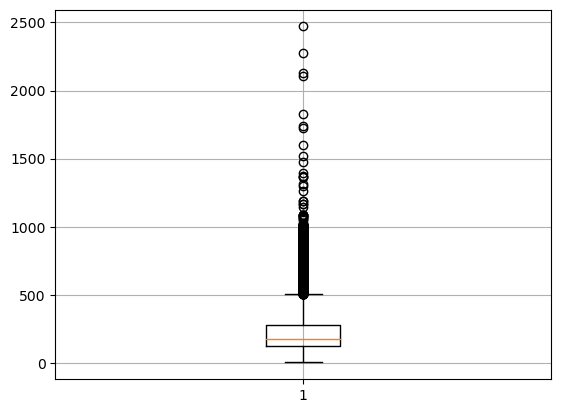

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(word_counts.values)
plt.grid(True)
plt.show()

__Observations:__  Most of the reviews have words 200-350.

## Data processing

In [27]:
#t first you have to download these nltk packages
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
    review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
    review = review.lower()
  
  # tokenization
    tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
    review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
  #We are using lemmatization and not stemming because 
  #while testing results with both, lemmatization gives slightly better results compared to stemming.
    
  # join words in preprocessed review
    review = ' '.join(review)
  
    return review

In [45]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,preprocessed_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high cartoon comedy ran time program ...
1,I liked the film. Some of the action scenes we...,1,liked film action scene interesting tense well...
2,Somewhat funny and well-paced action thriller ...,1,somewhat funny well paced action thriller jami...
3,Just two comments....SEVEN years apart? Hardly...,1,two comment seven year apart hardly evidence f...
4,"Another Aussie masterpiece, this delves into t...",1,another aussie masterpiece delf world unknown ...


#### Positive Reviews Wordcloud

In [49]:
#pip install wordcloud

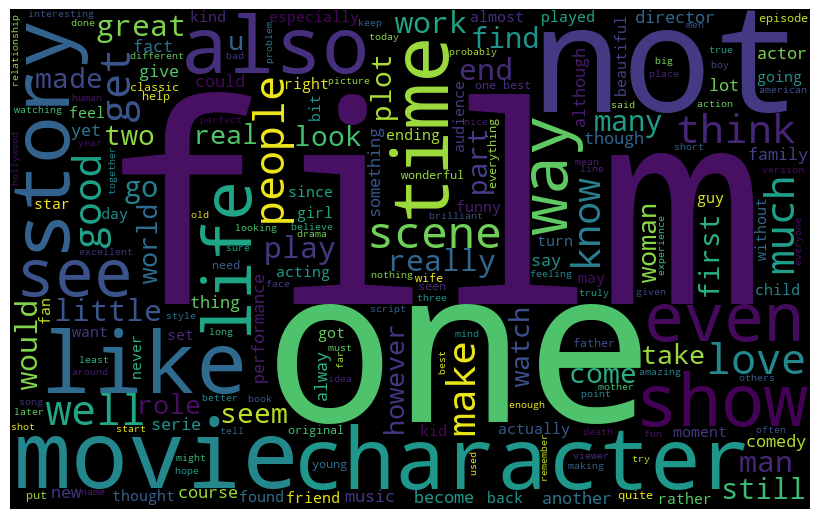

In [50]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Negative Reviews Wordcloud

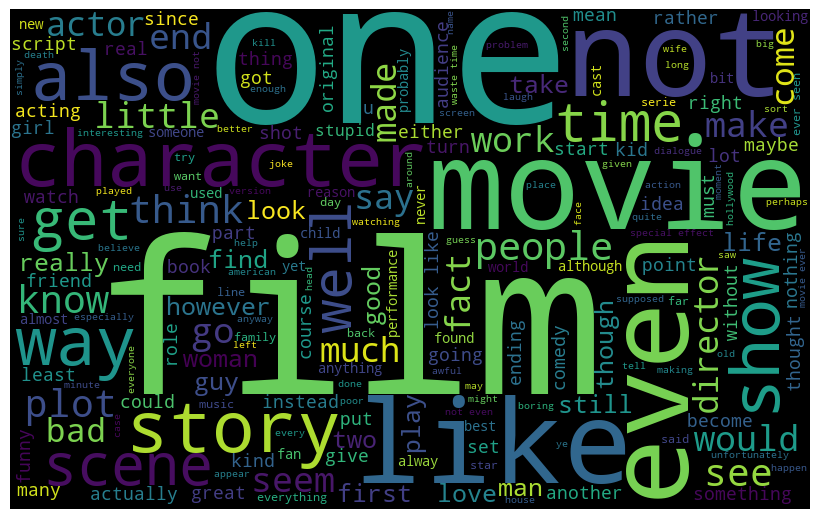

In [51]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Splitting data(70-30): Train | Test

In [52]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)
#we are using parameter stratify, to have an equal proportion of classes in train and test.

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (30450, 2) (30450,)
Test data: (13051, 2) (13051,)


## Vectorizing Text Data

#### BOW

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)
#Here we have used min_df=10 as we only want those words which occur at least 10 times in the whole corpus.

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (30450, 18058)
X_test_review_bow shape:  (13051, 18058)


#### TFIDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (30450, 18058)
X_test_review_tfidf shape:  (13051, 18058)


## Building Models

#### Naive Bayes: BOW

In [86]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

NB_BOW_clf = MultinomialNB()
NB_BOW_clf.fit(X_train_review_bow, y_train)

y_pred = NB_BOW_clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.8581717876024826


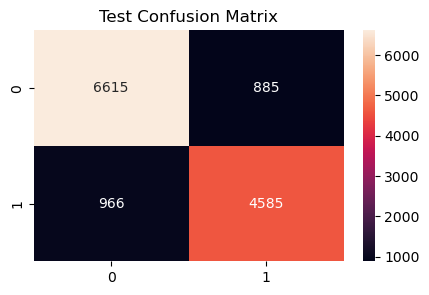

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

#### Naive Bayes: TFIDF

In [88]:
NB_TFIDF_clf = MultinomialNB(alpha=1)
NB_TFIDF_clf.fit(X_train_review_tfidf, y_train)

y_pred = NB_TFIDF_clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8507394069419968


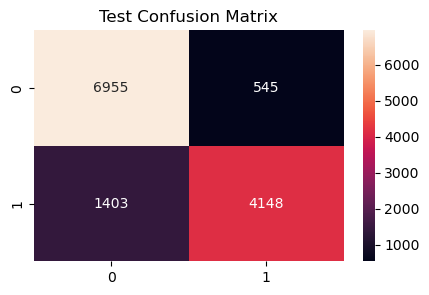

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

#### Logistic Regression: TFIDF

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#l1 REGULARIZTION

In [90]:
from sklearn.linear_model import LogisticRegression

LG_L1_TFIDF_clf = LogisticRegression(penalty='l1', solver='liblinear') 
#sOLVER IS Algorithm to use in the optimization problem. Default is ‘lbfgs’. 


LG_L1_TFIDF_clf.fit(X_train_review_tfidf, y_train)

y_pred = LG_L1_TFIDF_clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8813883993563711


In [70]:
#l2 REGULARIZTION

In [91]:
from sklearn.linear_model import LogisticRegression

LG_L2_TFIDF_clf = LogisticRegression(penalty='l2')
LG_L2_TFIDF_clf.fit(X_train_review_tfidf, y_train)

y_pred = LG_L2_TFIDF_clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8948739560186959


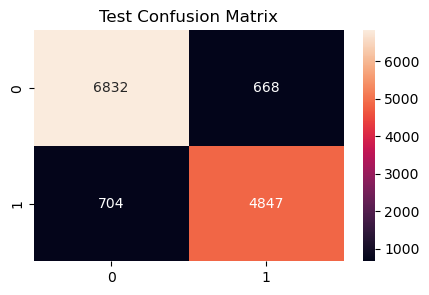

In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

## Conclusion

In [68]:
#pip install PrettyTable

In [93]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '85.1%'])
x.add_row(['TFIDF', 'Naive Bayes', '85.3%'])
x.add_row(['TFIDF', 'Logistic Regression-L1', '88.0%'])
x.add_row(['TFIDF', 'Logistic Regression-L2', '89.0%'])

print(x)

+------------+------------------------+----------+
| Vectorizer |         Model          | Accuracy |
+------------+------------------------+----------+
|    BOW     |      Naive Bayes       |  85.1%   |
|   TFIDF    |      Naive Bayes       |  85.3%   |
|   TFIDF    | Logistic Regression-L1 |  88.0%   |
|   TFIDF    | Logistic Regression-L2 |  89.0%   |
+------------+------------------------+----------+


In [94]:
#Name of classefiers sorted by best ones
# 1- LG_L2_TFIDF_clf
# 2- LG_L1_TFIDF_clf
# 3- NB_TFIDF_clf
# 4-NB_BOW_clf

In [98]:
#Name of vectorizers
# tf-idf ---> vectorizer
# bow ------> vect

## Test models with our data

In [99]:
def predict_sent(review ,vectorizer, model):
    review=data_preprocessing(review)
    review_vec=vectorizer.transform([review])
    prediction =LG_L2_TFIDF_clf.predict(review_vec)
    
    if(prediction==1):
        prediction = 'That is a positive review'
    else:
        prediction = 'That is a Negative review'
    print(prediction)
    
    


In [103]:
predict_sent("i am happy , it is a good Movie" , vect , NB_BOW_clf)
predict_sent("i am happy , it is a good Movie" , vectorizer , LG_L2_TFIDF_clf)
predict_sent("i am happy , it is a good Movie" , vectorizer , NB_TFIDF_clf)

That is a positive review
That is a positive review
That is a positive review


## Save the models and vectorizer for deployment

In [110]:
import pickle
pickle.dump(LG_L2_TFIDF_clf, open('model1.pkl', 'wb'))
pickle.dump(NB_TFIDF_clf, open('model2.pkl', 'wb'))
pickle.dump(NB_BOW_clf, open('model3.pkl', 'wb'))
pickle.dump(vectorizer, open('tf_vectorizer.pkl', 'wb'))
pickle.dump(vect, open('BOW_vectorizer.pkl', 'wb'))
